In [1]:
# We will be using Markdown to display text

# Relaxed Phase-Matching Constraints In Zero-Index Waveguides

An executable paper by Aryaman Mihir Seth, Divyansh Tiwari, Jesper Laurberg Sand, Nidhi Shaw, and Tina Garg,
inspired by the recent [publication in Physical Review Letters](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.128.203902) by the same name. 

## Individual Contributions to the Executable Paper

* Aryaman: 
* Divyansh: 
* Jesper:
* Tina:
* Nidhi:

In [2]:
#Dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import decimal
decimal.getcontext().prec = 100
import imagesc as imagesc
from scipy.interpolate import interp1d
from scipy import interpolate 
from scipy.interpolate import make_interp_spline
from scipy.signal import savgol_filter

## Important Definitions and Abbreviations

* **Parametric non-linear optical process**: An interaction wherein conservation of energy between the input and output light waves is maintained.
* **Phase mismatch**: It quantifies the wave vector mismatch between the input and output light waves. A non-linear optical interaction is **phase matched** when the phase mismatch equals zero.
* **Metamaterial**: Any material engineered to have a property that is not found in naturally occurring materials. 
* $\bf l_c$: coherence length

## Background & History: Contextualizing the Publication

### Coherence Length

When a nonlinear interaction is phase-mismatched (i.e., possesses non-zero wave-vector mismatch), the difference in accumulated phase between the frequency components of the nonlinear interaction can build up as they propagate in a nonlinear medium. Eventually, this discrepancy leads to newly generated photons interfering destructively with the propagating beam. Consequently, in such interactions, a nonlinear wave can only be generated over the coherent buildup length, more simply known as the coherence length, $l_c$, where substantial destructive interference does not yet occur. Thus $l_c$ is essentially the maximum length to which a power built up is observed, before phase mismatch between the pump and the generated wave results in amplitude decrease rather than growth[1]. The same can be visualized in through our reproduction (plot xx) of FIG. 2 from [1] itself, which shows how phase mismatch affects the intensity of the ouput beam. This discussion becomes more insightful when a little later, we discuss the work done by Suchowski et al. [9]

### Previous Attempts

Phase matching with non-conventional beam orientations has previously been investigated. In 2015, Lan et al. demonstrated the generation of a backward-propagating signal wave when using the nonlinear optical interaction of second-harmonic generation [5, 6, 7, 8]. To accomplish this, they used a negative-index metamaterial that exhibited a positive refractive index at the pump wavelength $\lambda_p$, and a negative refractive index equal in magnitude to the pump wave’s index at the signal wavelength $\lambda_s = \lambda_p/2$. Due to the wave vector’s dependence on the refractive index $$k=\frac{2\pi n}{\lambda},$$ where k is the wave vector, n is the refractive index, and $\lambda$ is the wavelength, the phase difference for a backward-propagating signal wave, $\Delta k = 2k_p + k_s$, was equal to zero. Therefore, the interaction was perfectly phase-matched. Were the refractive index positive everywhere, phase matching a backward-propagating signal wave would not have been possible. However, phase-matching a backward-propagating signal wave in this manner means that a forward-propagating signal wave, whose phase mismatch is given by $\Delta k = k_p - 2k_s$, is not phase-matched.

In 2013, Suchowski et al. [9] demonstrated the simultaneous generation of forward and backward propagating signal waves using FWM. To accomplish this, they used a zero-index fishnet metamaterial and placed the generated signal wave at a wavelength where the refractive index was zero. When n = 0, light has a vanishing wave vector k = 0. This means that the sign in the phase mismatch dictated by the orientation of the signal wave becomes completely inconsequential to the value of the phase mismatch in this situation. As a result, the generated signal wave was free to be forward or backward propagating, without any directional restriction. This freedom in wave orientation eliminates one of the greatest restrictions of phase matching — the necessity for careful alignment and of a specific orientation for the input and output beams. However, while Suchowski et al. demonstrated the generation of forward and backward propagating idler beams for a particular arrangement of the pump and signal beams — co-propagation — they did not further corroborate this lack of directional restriction with any other arrangement of beams. Furthermore, the metamaterial that they used was shorter in thickness (d = 800 nm) than the free-space optical wavelength used in their experiment (1510 nm). It is well-known that phase mismatch is not a major concern over such small propagation lengths - recall our discussion on coherent length a little while earlier.

### Overview of the publication - the authors' approach to phase matching

The authors essentially address the phase-matching problem by using near-zero-index media, which exhibit a refractive index n of zero at a wavelength of 1600 nm, and a very small refractive index in a 100 nm range in the surrounding bandwidth. They investigate the underlying theory and present calculations that reveal the potential for omnidirectional phase matching in zero-index materials by using the nonlinear optical process of FWM as an exemplar. Furthermore, they perform experimental demonstrations of phase matching for five separate FWM beam configurations to confirm this phenomenon, and compare their experimental results to theoretical predictions.

There are multiple improvements over the report published by Suchowski et al. The most notable among these is the removal of any dimensional restriction for all beams and not just the generated signal beam. Moreover, the setup works even when the input probe beam is orthogonal to the pump and signal. Critically, both of these feats are previously unobserved phenomena. The latter demonstration is of particular importance, as it reveals that the components of the nonlinear interaction need not even be collinear for an interaction to be phase-matched. Furthermore, the authors use a nonlinear waveguide 14.8 μm in length, as opposed to the 800 nm fishnet metamaterial employed by Suchowski et al. As stated above, in a shorter metasurface, phase mismatch is not a major concern due to the small propagation length not allowing the constituent waves to go out of phase. Finally, their demonstration uses multiple spectrally distinct beams as opposed to a degenerate FWM process. By having spectrally distinct components in their FWM process, their measurements are capable of cleanly isolating the generated nonlinear pulse from the inputs, and, therefore, unambiguously demonstrate the desired effect.

# **1. Theory**
In this part, we look at the underlying theory of the experiment.

## Basics
For a lossless and dispersionless material, there is a linear dependence of polarisation on electric field:

$$\textbf{P}(t)=\epsilon_0\chi^{(0)}\textbf{E}(t)$$


In a nonlinear medium, this dependence can be expanded to a power series.

$$\textbf{P}(t)=\epsilon_0\left[\chi^{(1)}\textbf{E}(t)+\chi^{(2)}\textbf{E}^2(t)+\chi^{(3)}\textbf{E}^3(t)+\ldots\right]$$

The nonlinear susceptibilities are usually taken to be constants for a dispersionless medium.

The second order polarisation due to interaction of the light beam with the medium is:

$$\textbf{P}^{(2)}(t) = \epsilon_0\chi^{(2)}\textbf{E}^2(t)$$

We express the electric field in terms of two frequency components as:

$$\textbf{E}(t) = E_1e^{-i\omega_1t}+E_2e^{-i\omega_2t}+c.c.$$

We can substitute this into the second-order polarisation and get

$$\textbf{P}^{(2)}(t) = 2\epsilon_0\chi^{(2)}(E_1E_1^*+E_2E_2^*)+\epsilon_0\chi^{(2)}(E_1^2e^{−2i\omega_1t} + E_2^2e^{−2i\omega_2t}+2E_1E_2e^{−i(\omega_1+\omega_2)t} + E_1E_2^∗e^{−i(\omega_1−\omega_2)t} + c.c.)$$


The nonlinear interaction of second-harmonic generation is due to the following terms:

$$P(2\omega_1) = \epsilon_0\chi^{(2)}E_1^2 $$

$$P(2\omega_2) = \epsilon_0\chi^{(2)}E_2^2 $$

The above two terms represnt the second-harmonic generation of signal waves of frequencies $\omega=2\omega_1$ and $\omega=2\omega_2$ from two pump waves of frequencies $\omega_1$ and $\omega_2$ respectively.

There are other second-order interactions such as sum-frequency generation, difference-frequency generation and optical rectification.

In sum-frequency generation (SFG), two photons of frequencies $\omega_1$ and $\omega_2$ combine to yield a photon of energy $\omega_3=\omega_1+\omega_2$.

In difference-frequency generation (DFG), a photon of higher frequency $\omega_1$ splits into two new photons of frequencies $\omega_2$ and $\omega_3=\omega_1-\omega_2$.

Finally, optical rectification occurs when the new frequency is the difference of one frequency with itself ($\omega_3 = \omega_1 - \omega_1 = 0$). This generates a static electric field.


### **Four-wave Mixing**

This procedure involves third-order nonlinear processes:

$$\textbf{E}(t) = E_1e^{−i\omega_1t} + E_2e^{−i\omega_2t} + E_3e^{−i\omega_3t} + c.c.$$

Substituting the above equation in the polarisation power series expansion yields $44$ distinct frequency terms. So we use the pump-degenerate four-wave mixing which is a third-order nonlinear process. This process is described by the following term:

$$P(2\omega_1 −\omega_2)=3\epsilon_0\chi^{(3)}E_1^2E_2^∗$$

In a pump-degenerate FWM nonlinear process, two photons (pump photons) at a frequency $\omega_1$ are converted into one photon (signal photon) of frequency $\omega_2$ and one photon (iddler photon) of frequency $\omega_3 = 2\omega_1-\omega_2$. We have:

$$\omega_p +\omega_p = (\omega_p +\delta\omega)+(\omega_p −\delta\omega) $$
$$=\omega_s + \omega_i$$

The pump degeneracy here implies that both the pump photons have the same energy. Most FWM processes are pump-degenerate.

## Wave Equation in Nonlinear Optics

Assume that the electric current density, $\textbf{J} = 0$. Maxwell's equations:
\begin{equation*}
\nabla\cdot \textbf{D} = 0
\label{eq:maxwell_1} \tag{1}
\end{equation*}

\begin{equation*}
\nabla\cdot \textbf{B} = 0
\label{eq:maxwell_2} \tag{2}
\end{equation*}

\begin{equation*}
\nabla\times \textbf{E} = -\frac{\partial\textbf{B}}{\partial t}
\label{eq:maxwell_3} \tag{3}
\end{equation*}

\begin{equation*}
\nabla\times \textbf{H} = \frac{\partial\textbf{D}}{\partial t}
\label{eq:maxwell_4} \tag{4}
\end{equation*}

<!-- $$\nabla\cdot \textbf{D} = 0$$
$$\nabla\cdot \textbf{B} = 0$$ -->
<!-- 
$$\nabla\times \textbf{E} = -\frac{\partial\textbf{B}}{\partial t}$$
$$\nabla\times \textbf{H} = \frac{\partial\textbf{D}}{\partial t}$$ -->

\begin{equation*}
\Rightarrow\textbf{B} = \mu_0\mu\textbf{H}
\label{eq:maxwell_5} \tag{5}
\end{equation*}

\begin{equation*}
\Rightarrow\textbf{D} = \epsilon_0\epsilon\textbf{E} + P^{NL}
\label{eq:maxwell_6} \tag{6}
\end{equation*}

<!-- $$\Rightarrow\textbf{B} = \mu_0\mu\textbf{H}$$
$$\Rightarrow\textbf{D} = \epsilon_0\epsilon\textbf{E} + P^{NL}$$ -->

$\textbf{B}$ is the magnetic induction field, $\textbf{D}$ is the electric displacement field, and $\textbf{H}$ is the magnetic intensity field.

To obtain the nonlinear optical wave equation, substitute $\eqref{eq:maxwell_5}$ into $\eqref{eq:maxwell_3}$ and take the curl of both the sides to obtain:

\begin{equation*}
\nabla\textbf{E}_n-\frac{\epsilon_n\mu_n}{c^2}\frac{\partial^2\textbf{E}_n}{\partial t^2} = \frac{\mu_n}{\epsilon_0c^2}\frac{\partial^2\textbf{P}_n^{NL}}{\partial t^2}
\label{eq:NL_Wave_Equation} \tag{7}
\end{equation*}

Here, the subscript $n$ is used to denote each frequency component of the field.

### Coupled-amplitude Equations

<insert pic of coupled-amplitude equations block and signals>
    
 When $\textbf{P}^{NL} = 0$, the solution to the nonlinear optical wave equation is a plane wave propagating in the $z$ direction. This wave is described by the following equation:
 
\begin{equation*}
\textbf{E}_n(z, t) = A_ne^{i(k_nz-\omega_nt)} + c.c.
\label{eq:coupled_amp} \tag{8}
\end{equation*}
    
When $\textbf{P}^{NL}$ is nonzero and not very large, we can take $\eqref{eq:coupled_amp}$ as the solution to the nonlinear optical wave equation with the nonlinear source included. We represent this nonlinear source as:
   
\begin{equation*}
\textbf{P}_n(z, t) = P_ne^{-i\omega_nt} + c.c.
\label{eq:NL_Source} \tag{9}
\end{equation*}
    
Now we represent the pump, signal and idler terms for $P_n$:
    
\begin{equation*}
P_p = 3\epsilon_0\chi^{(3)}A_p^∗A_sA_ie^{i(k_sz+k_iz-k_pz)} + c.c.
\label{eq:NL_Source_pump} \tag{10}
\end{equation*}
    
\begin{equation*}
P_s = 3\epsilon_0\chi^{(3)}A_p^2A_i^*e^{i(2k_pz - k_iz)} + c.c.
\label{eq:NL_Source_signal} \tag{11}
\end{equation*}
    
\begin{equation*}
P_i = 3\epsilon_0\chi^{(3)}A_p^2A_s^*e^{i(2k_pz - k_sz)} + c.c.
\label{eq:NL_Source_idler} \tag{12}
\end{equation*}
    
Substituting the terms into the nonlinear optical wave equation, we finally get,
    
\begin{equation*}
\frac{d^2A_i}{dz^2}+2ik_i\frac{dA_i}{dz} = \frac{-3\mu_i\omega_i^2\chi^{(3)}}{c^2}A_p^2A_s^*e^{i(2k_pz-k_sz-k_iz)}
\label{eq:NL_Source_final} \tag{13}
\end{equation*}
    
Since the second derivative varies very slowly, we can drop the second derivative. This gives us:
\begin{equation*}
\left|\frac{d^2A_i}{dz^2}\right| << \left|k_i\frac{dA_i}{dz}\right|
\label{eq:SVAA} \tag{14}
\end{equation*}
    
Now we define the wave vector mismatch factor $\delta k$:
\begin{equation*}
\Delta k \equiv 2k_p - k_s - k_i
\label{eq:phase_mismatch} \tag{15}
\end{equation*}
    
Making use of $\eqref{eq:phase_mismatch}$ and $\eqref{eq:SVAA}$ in $\eqref{eq:NL_Source_final}$, we get the coupled-amplitude equation for the idler frequency:
    
\begin{equation*}
\frac{dA_i}{dz} = \frac{3i\mu_i\omega_i\chi^{(3)}}{2n_ic}A_p^2A_s^*e^{i\Delta kz}
\label{eq:coupled_idler} \tag{16}
\end{equation*}
    
Similarly, we obtain the coupled-amplitude equations for the pump and signal frequencies:
    
\begin{equation*}
\frac{dA_p}{dz} = \frac{3i\mu_p\omega_p\chi^{(3)}}{2n_pc}A_p^*A_sA_ie^{-i\Delta kz}
\label{eq:coupled_pump} \tag{17}
\end{equation*}
    
\begin{equation*}
\frac{dA_s}{dz} = \frac{3i\mu_s\omega_s\chi^{(3)}}{2n_sc}A_p^2A_i^*e^{i\Delta kz}
\label{eq:coupled_signal} \tag{18}
\end{equation*}
    
The above three equations describe the FWM entirely.

### Phase Matching

In order to solve the coupled-amplitude equations, we use the undepleted pump approximation. As a result of this, the pump and signal wave amplitudes, $A_p$ and $A_s$ remain constant.

When we have the condition of perfect phase matching ($\Delta k = 0$), the idler coupled-amplitude is solved with:

\begin{equation*}
A_i = \frac{3i\mu_i\omega_i\chi^{(3)}}{2n_ic}A_p^2A_s^*L
\label{eq:idler_soln} \tag{19}
\end{equation*}

where $L$ is the length of the waveguide.

When $\Delta k \neq 0$, the solution to the idler coupled-amplitude becomes:

\begin{equation*}
A_i = \frac{3i\mu_i\omega_i\chi^{(3)}}{2n_ic}A_p^{*2}A_s\int^{L}_{0
} e^{i\Delta kz} dz
\label{eq:idler_soln_mismatch} \tag{20}
\end{equation*}

\begin{equation*}
=\frac{3i\mu_i\omega_i\chi^{(3)}}{2n_ic}A_p^{*2}A_s\left(\frac{e^{i\Delta kL} - 1}{i\Delta k}\right)
\label{eq:idler_soln_mismatch2} \tag{21}
\end{equation*}

Squaring the modulus of the phase-matching term:
\begin{equation*}
\DeclareMathOperator{\sinc}{sinc}
\left|\frac{e^{i\Delta kL} - 1}{i\Delta k}\right|^2 = L^2\frac{\sin^2(\Delta kL/2)}{(\Delta kL/2)^2} \equiv L^2\sinc^2(\Delta kL/2)
\label{eq:mod_phase_match} \tag{22}
\end{equation*}

We can define a length variable which depends on the phase matching. This 

\begin{equation*}
L_{coh} = \frac{2}{\Delta k}
\label{eq:L_coh} \tag{23}
\end{equation*}

Text(0.5, 0, '$\\Delta kl/2$')

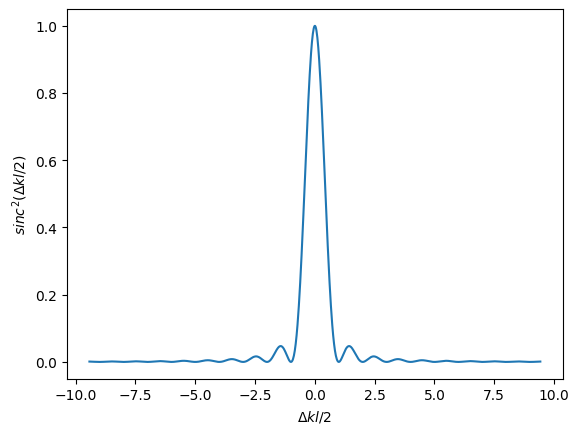

In [3]:
# Plotting the sinc function
x= np.linspace(-3*np.pi,3*np.pi,1000)
func = np.sinc(x)**2
plt.plot(x,func)
plt.ylabel("$sinc^2(\Delta kl/2) $")
plt.xlabel("$\Delta kl/2$")

## Zero-index Materials

Classical optics induces the notion that the refractive index of materials is greater than or equal to one. A refractive index lower than one would result in strange phenomena like a phase velocity exceeding that of light.

### Properties of Zero-index Materials

Zero-index materials imply a infinite phase velocity resulting in a phaseless propagation. We can confirm this by looking at 

\begin{equation*}
v_p = c/n
\label{eq:zero_index} \tag{24}
\end{equation*}

where $v_p$ is the phase velocity, $c$ is the speed of light and $n$ is the refractive index of the material.
To overcome this violation, special relativity limits the signal velocity to the speed of light. The signal velocity is equal to the group velocity in most cases. So,

\begin{equation*}
v_g = \frac{c}{n + \omega\frac{\partial n}{\partial\omega}}
\label{eq:sig_velo} \tag{25}
\end{equation*}

where $\frac{\partial n}{\partial\omega}$ describes the dispersion. When the dispersion is zero, then the group velocity equals the phase velocity. By logic, we deduce that zero-index mediums will have some dispersion. This also implies that the refractive index can be zero only at a single point without causing large losses. This length where the refractive index is allowed to be zero is called the *zero-index waevelength*.


### Phase Matching in Zero-index Materials

As deduced earlier, the phase matching condition is calculated by the difference between the  momenta of the input and output beams:

\begin{equation*}
\Delta k = 2k_p - k_s - k_i
\label{eq:phase_match} \tag{26}
\end{equation*}

Zero-index materials can eliminate the phase-matching contribution of any wave located at the zero-index wavelength and makes the phase-matching contribution independent of the wave orientation. 

# **2. Dirac-cone Metamaterial**

### Band structure of photonic crystals

Unlike solid-state crystals, photonic crystals have a periodic dielectric function $ε$ and periodic magnetic function $μ$ (where $ε$ and $μ$ are functions of $x,y,z$). A photonic band structure, which controls the operating wavelengths for a given mode of light, is induced due to such periodic dielectric.

Maxwell's equations conclude the band structure of photonic crystals.
\begin{equation*}
∇.[ε(r)E(r,t)] = 0
\end{equation*}

\begin{equation*}
∇.[μ(r)H(r,t)] = 0
\end{equation*}

\begin{equation*}
∇×E(r,t) = -μ_0μ(r){∂H(r,t)/∂t}
\end{equation*}

\begin{equation*}
∇×H(r,t) = ε_0ε(r){∂E(r,t)/∂t}
\end{equation*}

are the maxwell's equations, where r is the position vector.The time and position dependence of the fields $E(r, t)$ and $H(r, t)$ get further separated by expanding them into a set of harmonic modes $E(r)$ and $H(r)$ as Maxwell's equations are linear. The following expressions are obtained thus:
\begin{equation*}
E(r, t) = E(r)e^{iωt}
\end{equation*}

\begin{equation*}
H(r; t) = H(r)e^{iωt}
\end{equation*}

On substituting these in Maxwell's equations scalar product equations are obtained:
\begin{equation*}
∇.[ε(r)E(r)] = 0
\end{equation*}

\begin{equation*}
∇.[μ(r)H(r)] = 0
\end{equation*}

whereas the curl equations take the form:
\begin{equation*}
∇×E(r) = iωμ_0μ(r){H(r)}
\end{equation*}

\begin{equation*}
∇×H(r) = -iωε_0ε(r){E(r)}
\end{equation*}

On dividing the second curl equation by $ε(r)$, then taking curl on both sides, followed by substituting first curl equation into second, the equation obtained is:

\begin{equation} {1/μ(r)}∇×{({1/ε(r)}∇×H(r))} = ε_0μ_0ω^2H(r) \end{equation} 

This is the master equation from which the allowed modes $H(r)$ and it's corresponding permitted eigenfrequencies $ω$ can be found, for a given $μ(r)$ and $ε(r)$.

<img src="3.1.png" title = "Photonic band Structure of the Glass"> 




### Dirac-cone Waveguides

In a periodic structure, the Brillouin belt is outlined as the set of points in the reciprocal
lattice( k-space, as defied to a spatial lattice) which are closest to k = 0. In a 2D square lattice, three points of interest can be outlined within the Brillouin belt the τ-point, χ-point and M-point.

The coordinates of these points given separation $a$ are:
$$ τ-point → (0,0) $$

$$ χ-point → ({π/a},0) $$

$$ M-point → ({π/a},{π/a}) $$

The τ-point defines the center, χ-point defines the edge and M-point defines the corner of the unit cell.
<img src="3.2.png" > 

Generally, utmost
intriguing phenomenas of the photonic band structure of a material take place at these three
points. 

The τ-point being at (0,0) in momentum space, implies that n = 0 at this point due to the relation k = 2πn/λ. Hence a zero-index material must operate at this point in momentum space.

Considering the example of an infinitely long plane of glass slab made up of silicon, perforated by a square array of holes: The structure has translational symmetry, though it is discrete than continuous.
For perforated slab, the lowest order solutions are:
> A quadrupole mode (two positive and two negative components of the field are arranged on the four sides of the unit cell) and 

> Two dipole modes (one positive and one negative component of the field on each side of its unit
cell). 

<img src="3.3d.png" > 

It is observed thet the bands corresponding to the three modes intersect at the τ-point of the Brillouin zone. The intersection of the top and bottom bands in such manner is known as a Dirac cone.Achieving a Dirac cone in the band structure of a lattice enables the permittivity and permeability to simultaneously cross zero.

<img src="3.3e.png" > 

When the above modes don't cross to form a Dirac cone, the permittivity
and permeability don't concurrently cross zero. Rather, in the region of the bandgap between the two modes, a positive permittivity and a negative permeability or vice
versa are attained. **ACC to eqn (2.58)**, This results in an imaginary refractive index. While it seems that this would permit for a continuous real refractive index of zero in this region, this also results in very high losses and a deviating group velocity in
the region of the bandgap. Reversely, in the case where these
bands cross, $μ$ and $ε$ concurrently cross zero, resulting in a much lower imaginary refractive index and a finite group index.

*?to include?(The waveguide used here consists of a single line of unit cells contrary to 2D infinite array. For a 1-D analog, the Dirac cone becomes a pair of two bands corresponding to dipole and quadrupole mode; the central band corresponding to longitudinal dipole moment is no longer present.fig. 3.5b)*



### Fabrication and characterization

In order to fabricate the waveguides used in test:
> A pattern is written using electronbeam
lithography into a negative- tone resist. 

>This pattern is laterally applied to a silicon
substrate using inductively- coupled plasma reactive ion drawing. 

>A photonic-band-gap material (PBG) is etched on either side of the waveguide. 

The PBG materials are not mandatory to shape the refractive indicator profile but they help to confine the light into the
waveguide which minimizes losses. The PBG materials are also photonic crystals, and are designed to retain a bandgap at the zero-indicator wavelength of the zero-indicator waveguide. The waveguides are designed to work in the near-infrared (NIR), therefore, the bandgap of the PBG materials occurs in this region. Due to the bandgap, the PBG
materials reflect light in this spectral region back into the waveguide. 

>The light coupling out
of the zero-indicator waveguide does so at 90 degrees, thus the PBG material is placed at a distance from the waveguide corresponding to a 2π phase shift. 

This cancels out exiting
radiation while maintaining an effective phase advance of zero. 

>To grease coupling into the waveguides with free-space
shafts, polymer coupling pads with large cross-sectional areas are constructed on the ends of
the waveguide. 

These polymer pads are used to couple into silicon waveguides, which also
lead to the zero-indicator waveguides. 

While the waveguides used then are constructed from
silicon, it must be noted that Dirac-cone zero-indicator materials can be constructed from anybase material. Then, we've used silicon for the simplicity of fabrication. Any
material can however, including materials with a larger $χ^3$, be used in the fabrication process. The
size of the device can also be gauged similar that the zero-indicator wavelength occurs wherever
asked.

In [4]:
# Data values used for the Refractive index, loss profile and impedence
fac = 1e-9

# loss
lo = pd.read_csv('data/loss.csv')
lo_x = np.array(lo['x'])
lo_x *= fac
lo_y = np.array(lo['y'])

#refractive index
ri = pd.read_csv("data/ri.csv")
ri_x = np.array(ri['x'])
ri_x *= fac
ri_y = np.array(ri['y'])

# permeability
per = pd.read_csv("data/permeability.csv")
per_x =  np.array(per['x'])
per_x *= fac
per_y =  np.array(per['y'])



Text(0.5, 0, 'wavelength')

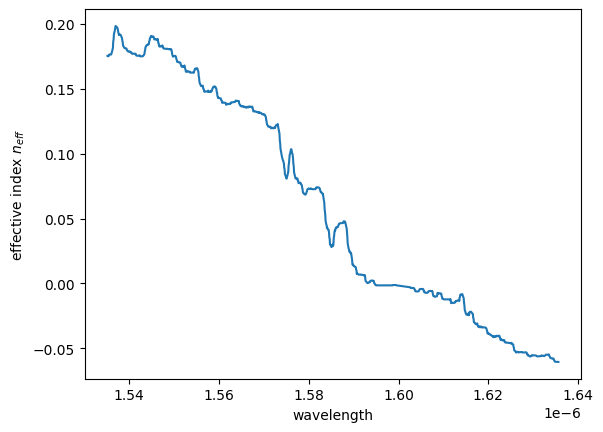

In [5]:
# plotting refractive index
plt.plot(ri_x,ri_y)
plt.ylabel("effective index $n_{eff}$")
plt.xlabel("wavelength")

Text(0.5, 0, 'wavelength')

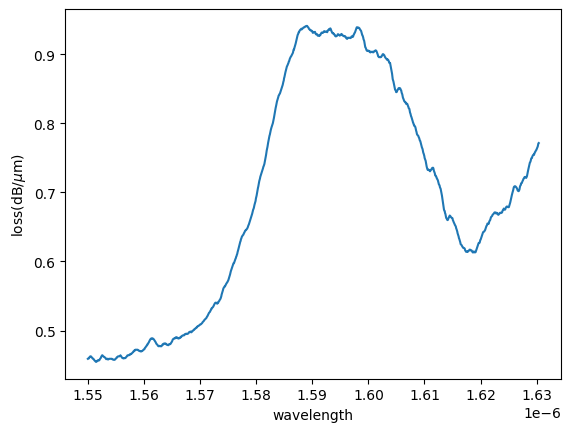

In [6]:
# plotting loss
plt.plot(lo_x,lo_y)
plt.ylabel("loss(dB/$\mu$m)")
plt.xlabel("wavelength")

Text(0.5, 0, 'wavelength')

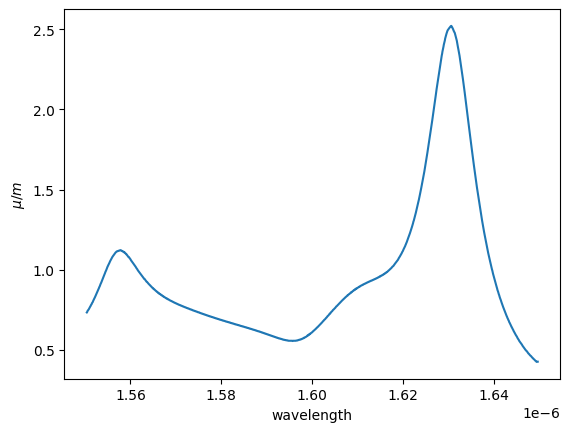

In [7]:
# plotting impedence
plt.plot(per_x,per_y)
plt.ylabel("$\mu/m$")
plt.xlabel("wavelength")

# **2. Model for phase matching in an FWM process**

### Phase matching with co-propagating pump and signal beams

The authors proceed to investigate the generation of a forward and backward propagating idler wave when using co-propagating pump and signal beams (forward and backward is with repect to the pump beam). In the lossless forward propagating case, the derivation is identical to the derivation done earlier for the coupled amplitude equations in FWM. However, for backward propagation, the idler beam possesses a negative momentum $-k_i$ as opposed to $k_i$ for forward propagation. Consequently, the electric field is written as: \begin{equation} E_i(z,t) = A_ie^{i(-k_iz-\omega_it)} + c.c. \end{equation} The subsequent derivation is otherwise identical and the ultimate result is nearly identical to the one previously obtained: $$|A_i|^2 = \frac{9\mu_i^2\chi^{(3)^2}\omega_i^2}{4\eta_i^2c^2}|A_p|^4|A_s|^2L^2sinc^2(\Delta k_bL/2)$$
<img src="4.1.png" > 
Note that the idler wave is generated in both directions. While the final result appears identical, the critically important difference lies in the phase matching condition $\Delta k$. As opposed to a forward-propagating idler wave, where the phase matching condition is given by $\Delta k_f = 2k_p - k_s - k_i$, the backward-propagating idler wave possesses the phase-matching condition $\Delta k_b = 2k_p - k_s + k_i$. Now, in the case where the idler wave is located at the xero-index wavelength, it has a vanishing momentum $k_i = 0$. Now, $\Delta k_f = \Delta k_b = 2k_p - k_s$. This implies that the backward propagating idler is just as well phase matched as the forward propagating idler when the idler is localized at the wavelength where $n=0$. Moreover, if we now have $k_s = 2k_p$, (which can be achieved in any low-dispersion zero-index medium), there will be simultaneous phase matching of te forward and backward propagating idler waves. Obviously, this is not possible in standard waveguides, and the coherence wavelength for a backward propagating idelr is much lesser than that in zero-index media. We add a loss term to account for amplitude depletion as the waves propagate through the waveguide. For a forward-propagating idler wave, these new coupled-amplitude equations take the form:


### Co-propagating pump and signal beams in lossy media

To adequately analyze experimental results, it is imperative to take losses into account. We add a loss term to account for amplitude depletion as the waves propagate through the waveguide. For a forward-propagating idler wave, these new coupled-amplitude equations take the form:
$$\frac{dA_p}{dz}=\frac{3i\mu_p\chi^{(3)}\omega_p}{2n_pc}A_p^*A_sA_ie^{-i\Delta k_fz} - \alpha_pA_p$$

$$\frac{dA_s}{dz}=\frac{3i\mu_s\chi^{(3)}\omega_s}{2n_sc}A_p^2A_i^*e^{i\Delta k_fz} - \alpha_sA_s$$

$$\frac{dA_i}{dz}=\frac{3i\mu_i\chi^{(3)}\omega_i}{2n_ic}A_p^2A_s^*e^{i\Delta k_fz} - \alpha_iA_i$$

Here, $\alpha$ is the propagation loss, which dictates how rapidly a wave decreases in amplitude. As before, $\Delta k_f = 2k_p - k_s - k_i$. Obviously, we cannot apply the undepleted pump approximation. This means that there is no closed analytic solution, and that the coupled amplitude equations must be solved numerically. However, we are here able to use a relaxed version of the undepleted pump approximation, which we name the *nonlinearly undepleted pump approximation*. This approximation states that while the amplitude of the pump and signal waves are not constant, they are only ever subject to radiative losses. In other words, this approximation states that the fraction of the pump and signal waves converted into the idler wave and vice versa is very small, and may be neglected. The approximation can be justified in experiments, as the generated idler is always approximately four orders of magnitude less powerful than the pump beam. Consequently, the coupled amplitude equations reduce to the following form:

$$\frac{dA_p}{dz} = -\alpha_pA_p$$

$$\frac{dA_s}{dz} = -\alpha_sA_s$$

$$\frac{dA_i}{dz}=\frac{3i\mu_i\chi^{(3)}\omega_i}{2n_ic}A_p^2A_s^*e^{i\Delta k_fz} - \alpha_iA_i$$

Unlike the previous set, these equations can be solved analytically. The first two can be solved trivally to obtain:
    
$$A_p(z) = A_{p0}e^{-\alpha_pz}$$

$$A_s(z) = A_{s0}e^{-\alpha_sz}$$

where $A_{p0}$ and $A_{s0}$ are the initial amplitudes of the pump and signal waves, obtained by finding the integration constants by using the initial conditions $A_p(0) = A_{p0} and A_s(0) = A_{s0}$. We substitute this into the differential equation for $A_i$ to obtain:

$$\frac{dA_i}{dz}=\frac{3i\mu_i\chi^{(3)}\omega_i}{2n_ic}A_{p0}^2A_{s0}^*e^{i\Delta k_fz}e^{-\Delta\alpha z} - \alpha_iA_i$$
where we have defined $\Delta\alpha = 2\alpha_p + \alpha_s$. This is a single linear differential equation, which can be solved. For brevity, we group the terms independent of z under the variable:

$$\Omega = \frac{3\mu_i\chi^{(3)}\omega_i}{2n_ic}A_{p0}^2A_{s0}^*$$
to get:
    
$$\frac{dA_i}{dz} + \alpha_iA_i = i\Omega e^{(i\Delta k_f - \Delta\alpha)z}$$

which can be solved to obtain:

$$A_ie^{\alpha_iz} = \frac{i\Omega e^{(i\Delta k_f - \Delta\alpha + \alpha_i)z}}{i\Delta k_f - \Delta\alpha +\alpha_i} + C$$

where C is the integration constant. We use the initial condition that $A_i(0) = 0$ to obtain:

$$C = \frac{-i\Omega}{i\Delta k_f - \Delta\alpha + \alpha_i}$$
Consequently, we obtain the final expression for the idler wave amplitude as a function of $z$:

$$A_i(z) = \frac{i\Omega(e^{(i\Delta k_f-\Delta\alpha)z} - e^{-\alpha_iz})}{i\Delta k_f - \Delta\alpha +\alpha_i}$$
Resubstituting for $\Omega$:

$$A_i(z) = \frac{3i\mu_i\chi^{(3)}\omega_i}{2n_ic}A_{p0}^2A_{s0}^*\frac{(e^{(i\Delta k_f-\Delta\alpha)z} - e^{-\alpha_iz})}{i\Delta k_f - \Delta\alpha +\alpha_i}$$


In [8]:
# Generating Idler wave spectra for  the forward and backward direction in a FWM process with co-propagating pump and signal

In [9]:
# initializing values of constants used
pump_wl = 1.600e-6
signal_wl = 1.580e-6
c0 = 299792458
deltaOmega = 2*np.pi*c0*((pump_wl - signal_wl)/(signal_wl*pump_wl))
lambda_p_number = 1500
lambda_start = 1.562e-6
lambda_end = 1.59888e-6
L = 1.48e-5
n_SI = 3.4757
eps_zero = 8.854e-12
X3 = 2.45e-19

In [10]:
# Generating wavelenghts based off of the pump
lambda_p = np.linspace(lambda_start,lambda_end, lambda_p_number)
lambda_s = np.divide((2*np.pi*c0*lambda_p),(2*np.pi*c0 + deltaOmega*lambda_p))
lambda_i = np.divide((2*np.pi*c0*lambda_p),(2*np.pi*c0 - deltaOmega*lambda_p))

#interpolating the data to fit the new wavelength values

#refractive index
n_fun = interp1d(ri_x, ri_y,fill_value = "extrapolate")
n_p = n_fun(lambda_p)
n_s =n_fun(lambda_s)
n_i = n_fun(lambda_i)

#loss
fac = 1e6*math.log(10)/20
loss_fun = interp1d(lo_x,lo_y,kind ="linear",fill_value = "extrapolate")
loss_p = loss_fun(lambda_p)*fac
loss_s = loss_fun(lambda_s)*fac
loss_i = loss_fun(lambda_i)*fac

#permeability
per_fun = interp1d(per_x,per_y,fill_value = "extrapolate")
per_i = per_fun(lambda_i)

Text(0, 0.5, '$ A_p  $')

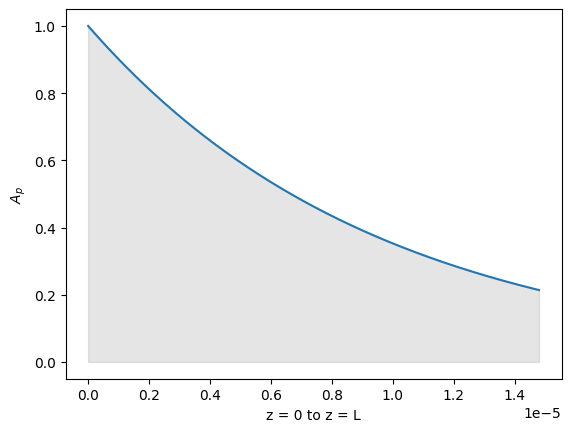

In [11]:
# Schematic demonstrating the swap in the frame of reference in the waveguide.
z = np.linspace(0,L,lambda_p_number)
a_p = loss_fun(pump_wl)
fac = 1e6*math.log(10)/20
a_p *=fac
a_p
q = np.exp(-a_p*z)

plt.plot(z,q)
plt.fill_between(z, 0, q, color='grey', alpha=.2)
plt.xlabel("z = 0 to z = L")
plt.ylabel("$ A_p  $")


Text(0, 0.5, '$ A_p e^{-(a_p L)}  $')

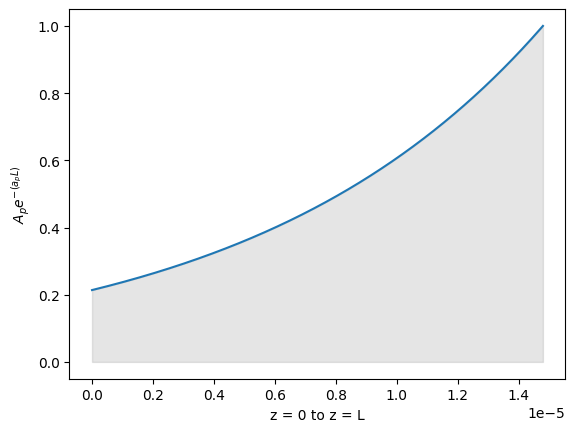

In [12]:
q_1 = np.exp(-a_p*L)*np.exp(+a_p*z)
plt.plot(z,q_1)
plt.fill_between(z, 0, q_1, color='grey', alpha=.2)
plt.xlabel("z = 0 to z = L")
plt.ylabel("$ A_p e^{-(a_p L)}  $")

We can follow an analogous procedure to obtain the expression for a backward propagating idler wave:

$$A_i(z) = \frac{3i\mu_i\chi^{(3)}\omega_i}{2n_ic}A_{p0}^2A_{s0}^*e^{-(2\alpha_p + \alpha_s)L}\frac{(e^{(\Delta\alpha -i\Delta k_b)z} - e^{-\alpha_iz})}{\Delta\alpha -i\Delta k_b +\alpha_i}$$

wherein the idler wave begins building at z = 0, and is detected at z = L. However, as the idler wave is counter-propagating against the pump and signal, it is instead arranged for the pump and signal waves to begin at z = L. This effectively inverts the frame of reference of the waveguide. To symbolically represent a wave that begins at z = L, say the pump wave, we cause the wave to begin at z = 0 with an amplitude $A_pe^{-\alpha_pL}$.

While our theoretical prediction based purely on phase-matching constraints states that
the forward-propagating idler wave should have equal magnitudes at every wavelength. However, our results indicate that this is not the case. This discrepancy can be explained by
incorporating a dispersive loss and impedance into the model.

In [13]:
# wave vectors
k_p = 2*np.pi*np.divide(n_p,lambda_p)
k_s = 2*np.pi*np.divide(n_s,lambda_s)
k_i = 2*np.pi*np.divide(n_i,lambda_i)

# Delta K and Delta loss values
delta_k_fw = 2*k_p -  k_s - k_i
delta_k_bw = 2*k_p -  k_s + k_i
delta_a = 2*loss_p + loss_s


In [14]:
# Generating Amplitudes 
w_i = np.divide(2*np.pi*c0,lambda_i)
Omega_fw = ((3.0/2)*X3) * np.divide(np.multiply(w_i,per_i),c0)
Omega_bw = ((3.0/2)*X3) * np.divide(np.multiply(w_i,np.multiply(np.exp(-(2*loss_p +loss_s)*L),per_i)),c0)

# Forward Amplitudes
idler_amp_fw = (1j * np.multiply(Omega_fw,np.divide(np.exp((1j*delta_k_fw - delta_a)*L) - np.exp(-loss_i*L),1j*delta_k_fw + loss_i - delta_a)))
intensity_fw = (2*n_SI*eps_zero * c0 *abs(np.multiply(idler_amp_fw,idler_amp_fw)))

#Backwards Amplitudes
idler_amp_bw = 1j * np.multiply(Omega_bw,np.divide(np.exp((-1j*delta_k_bw + delta_a)*L) - np.exp(-loss_i*L),-1j*delta_k_bw + loss_i + delta_a))
intensity_bw = 2*n_SI*eps_zero * c0 *abs(np.multiply(idler_amp_bw,idler_amp_bw))


In [15]:
#Refactoring
fac = 1e9
lambda_i *=fac

Text(0.5, 0, 'wavelength(nm)')

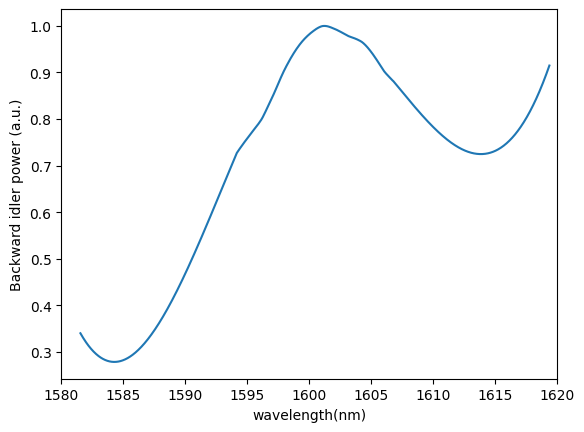

In [16]:
# plot of the backwards propagating idler wave
intensity_bw = savgol_filter(intensity_bw, 1000, 3)
intensity_bw =  np.divide(intensity_bw, np.max(intensity_bw))
plt.plot(lambda_i,intensity_bw)
plt.xlim(left=1580)  
plt.xlim(right=1620) 
plt.ylabel("Backward idler power (a.u.)")
plt.xlabel("wavelength(nm)")

Text(0.5, 0, 'wavelength(nm)')

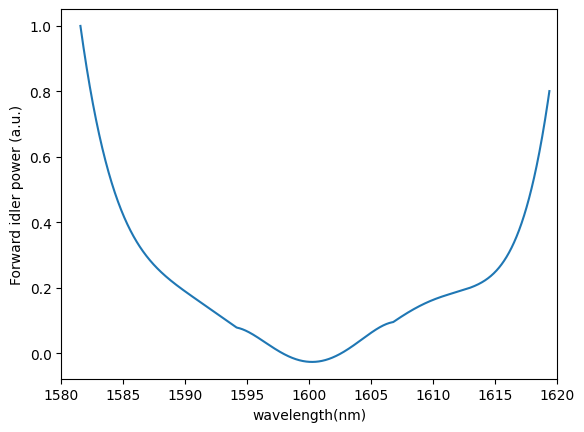

In [17]:
# plot of the forward porpagating idler wave 
intensity_fw = savgol_filter(intensity_fw, 1000, 6)
intensity_fw =  np.divide(intensity_fw, np.max(intensity_fw))
intensity_fw = savgol_filter(intensity_fw, 1000, 5)
intensity_fw =  np.divide(intensity_fw, np.max(intensity_fw))
plt.plot(lambda_i,intensity_fw)
plt.xlim(left=1580)  
plt.xlim(right=1620)
plt.ylabel("Forward idler power (a.u.)")
plt.xlabel("wavelength(nm)")

In summary, the fact that the simultaneously generated forward- and backward-propagating
idler peaks respond so differently to passing through the zero-index wavelength is overall
strong proof that the idler wave both shows directional independence, and that each direction is subject to its own phase-matching requirement.

We isolate the
effects of these two quantities on the output idler power by superimposing two curves over
the measurement results: a constant permeability and therefore a constant impedance with
a variable loss (red curve); and a variable permeability and a constant loss (green curve).
Plotting these two curves in this manner shows that when the impedance is held constant,
the forward-propagating idler is attenuated for wavelengths longer than 1600 nm.When the loss is held constant, the forward-propagating idler is attenuated for wavelengths shorter
than 1600 nm, and the resulting spectrum appears almost identical to the shape of the
impedance profile

Text(0.5, 0, 'wavelength(nm)')

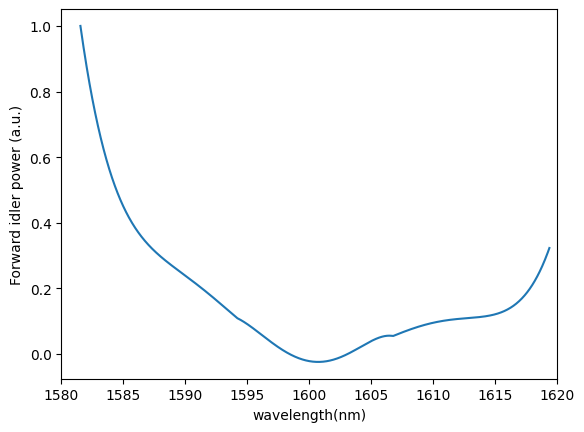

In [18]:
#Wavelength invariable impedence
Omega_fw = ((3.0/2)*X3) * np.divide(np.multiply(w_i,1),c0)
idler_amp_fw2 = (1j * np.multiply(Omega_fw,np.divide(np.exp((1j*delta_k_fw - delta_a)*L) - np.exp(-loss_i*L),1j*delta_k_fw + loss_i - delta_a)))
intensity_fw2 = (2*n_SI*eps_zero * c0 *abs(np.multiply(idler_amp_fw2,idler_amp_fw2)))
intensity_fw2 = savgol_filter(intensity_fw2, 1000, 6)
intensity_fw2 =  np.divide(intensity_fw2, np.max(intensity_fw2))
intensity_fw2 = savgol_filter(intensity_fw2, 1000 ,5)
intensity_fw2 =  np.divide(intensity_fw2, np.max(intensity_fw2))

plt.plot(lambda_i,intensity_fw2)
plt.xlim(left=1580)  
plt.xlim(right=1620)
plt.ylabel("Forward idler power (a.u.)")
plt.xlabel("wavelength(nm)")

Text(0.5, 0, 'wavelength(nm)')

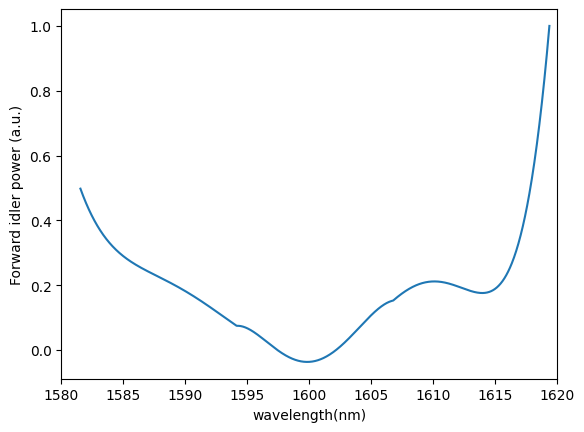

In [19]:
# Variation in the predictive model for Forward propagating idler wave
# Wavelength invariable loss
#loss
Omega_fw = ((3.0/2)*X3) * np.divide(np.multiply(w_i,per_i),c0)
fac = 1e6*math.log(10)/20
loss_fun = interp1d(lo_x,lo_y,kind ="linear",fill_value = "extrapolate")
loss_p = 0.5*fac
loss_s = 0.5*fac
loss_i = 0.5*fac
delta_a = 2*loss_p + loss_s

idler_amp_fw1 = (1j * np.multiply(Omega_fw,np.divide(np.exp((1j*delta_k_fw - delta_a)*L) - np.exp(-loss_i*L),1j*delta_k_fw + loss_i - delta_a)))
intensity_fw1 = (2*n_SI*eps_zero * c0 *abs(np.multiply(idler_amp_fw1,idler_amp_fw1)))
intensity_fw1 =  np.divide(intensity_fw1, np.max(intensity_fw1))
intensity_fw1 = savgol_filter(intensity_fw1, 1000, 6)
intensity_fw1 =  np.divide(intensity_fw1, np.max(intensity_fw1))
intensity_fw1 = savgol_filter(intensity_fw1, 1000, 5)
intensity_fw1 =  np.divide(intensity_fw1, np.max(intensity_fw1))

plt.plot(lambda_i,intensity_fw1)
plt.xlim(left=1580)  
plt.xlim(right=1620)
plt.ylabel("Forward idler power (a.u.)")
plt.xlabel("wavelength(nm)")


### Phase matching with counter-propagating pump and signal beams
The expressions for the counter-propagating case can be found by inverting the sign of the signal wave's momentum.
The plane wave equation for the signal beam now becomes 
$$ E_s(z,t) = A_s e^{i(-k_s z -w_s t)}  +cc $$
This changes very litttle in the derivation of of idler amplitude equations. However having a counter propagating signal also changes the phase matching conditions.After performing in the derivation, we arrive with the following expressions:
$$|A_i|^2 = \frac{9\mu_i^2\chi^{(3)^2}\omega_i^2}{4\eta_i^2c^2}|A_p|^4|A_s|^2L^2sinc^2(\Delta k_bL/2)$$
$$ \Delta k_f = 2k_p + k_s-k_i   $$
$$ \Delta k_b = 2k_p + k_s+ k_i   $$
We can plot the coherence length for these counter propagating beams using the refractive index dataof the zero index waveguide.The coherence length calculations for counter-propagating beams reveal that for a forward.propagating idler wave, the FWM interaction will remain coherent as long as the signal beam
is located at the zero-index wavelength. On the other hand, a backward-propagating idler
wave will remain coherent as long as the pump beam is located at the zero-index wavelength.
This is similar to the result for a backward-propagating idler wave with co-propagating pump
and signal beams, where the interaction remained coherent as long as the idler wave was
located at the zero-index wavelength. This is because in all of these cases, eliminating the
momentum contribution of those waves restores the phase-matching condition.a


### Counter-propagating pump and signal beams in lossy media
While the calculated coherence lengths for a FWM interaction with counter-propagating
pump and signal beams provide us valuable insight, their use is again limited when treating
the case of a lossy medium.In an interaction with co-propagating pump and signal beams, the pump and signal waves have
the benefit of possessing a large power overlap between them. However, when the beams
are counter-propagating, the pump and signal waves will both be the most powerful on their
respective ends of the waveguide, and gradually deplete as they move towards the opposing
facets. This means that the strongest portion of the pump wave intersects with the weakest
portion of the signal wave, and vice versa. As a result, the power overlap is not nearly as
large, and whatever overlap that is present is greatly dictated by the loss of the waveguide.
Therefore, it is critical even more so in the case of counter-propagating pump and signal
beams to develop a model that takes radiative losses into account. Our method to derive
a model is largely identical to the method used for co-propagating pump and signal beams.
For a forward-propagating idler wave, we have the coupled-amplitude equations

$$  \frac{dA_p}{dz} = -\alpha_p A_p, $$

$$  \frac{dA_s}{dz} = \alpha_p A_s, $$

$$  \frac{dA_i}{dz} = \frac{3i\mu_i\chi_i^{(3)}\omega_i}{2n_ic} A_p^2A_s^{*} e^{i\Delta k_fz}  -\alpha_i A_i, $$

Here, we have defined the waveguide as entering at z = L and exiting at z =0. Using initial conditions, we find that the pump and signal amplitutdes are:

$$  A_p = A_{po}e^{-\alpha_p z}, $$

$$  A_s = A_{so}e^{-\alpha_sL}e^{-\alpha_sz}, $$

When these expressions are included in the differential equation for the idler wave,  we can solve and obtain the final expression for the forward-propagating idler wave amplitude as a function of z:

$$ A_i(z) = \frac{3i\mu_i\chi_i^{(3)}\omega_i}{2n_ic} A_{po}^2A_{so}^{*}e^{-\alpha_s L} (\frac{e^{(i\Delta k_f -\Delta \alpha)z} - e^{-\alpha_iz} }{i \Delta k_f - \Delta \alpha + \alpha_i})  $$

with 
$$ \Delta \alpha = 2\alpha_p - \alpha_s$$

In the case of a backward-propagating idler wave, we again use our method of inverting the waveguide
such that the idler wave exits the waveguide at z = L. In this case, the coupled-amplitude
equations take the form:

$$  \frac{dA_p}{dz} = \alpha_p A_p, $$

$$  \frac{dA_s}{dz} = -\alpha_p A_s, $$

$$  \frac{dA_i}{dz} = \frac{3i\mu_i\chi_i^{(3)}\omega_i}{2n_ic} A_p^2A_s^{*} e^{i\Delta k_bz}  -\alpha_i A_i, $$

Using initial conditions, we find that the pump and signal amplitutdes are:
    
$$  A_p = A_{po}e^{-\alpha_p L}e^{}, $$

$$  A_s = A_{so}e^{-\alpha_sL}e^{-\alpha_sz}, $$

When these expressions are included in the differential equation for the idler wave,  we can solve and obtain the final expression for the backwards-propagating idler wave amplitude as a function of z:

 $$ A_i(z) = \frac{3i\mu_i\chi_i^{(3)}\omega_i}{2n_ic} A_{po}^2A_{so}^{*}e^{-\alpha_p L} (\frac{e^{(\Delta \alpha - i\Delta 
k_b)z} - e^{-\alpha_iz} }{i \Delta k_f  \Delta \alpha + \alpha_i})  $$


# Experiments

The experimental part consists of no coding, but explains how the experimental results shows that phase-matching conditions can be relaxed when employing zero-index material. It is divided into three overall experiments: Co-propagating pump and signal, counter-propagating pump and signal, and finally, an experiment where the signal beam is injected from outside the device layer plane.

## Experimental setup

### Pump

For the pump laser they use a combination of a continous wave (CW) Verdi 10 532 nm laser as source, a Mira Optima Ti:Saphh used for mode-locking creating pulses of up to 840 nm, and a Mira-OPO optical parametric oscillator emplying DFG to create its own signal and idler pulses that ore not used in experiment. This combination creates 1600 nm pulses with a repetition rate of 76 MHz, a temporat width of 3 ps, a spectral bandwidht of around 5 nm, and a peak power of 1300 W.

The reason for them using a pulsed laser as pump is that the power of the idler beam depends on the square of the power of the pump beam.

### Signal

As the pump is pulsed, they chose a Santec TSL-710 continous wave laser as signal source, since the combination of both a pulsed pump and a pulsed signal would require the inclusion of partial spatial overlap into the theoretical derivation. TSL-710 is a tunable laser, and therefore, the signal can be adjusted to a wavelength in the range 1480-1640 nm. By choosing a CW laser as signal and viewing the system from the frame of reference of the pump pulse, the two waves overlap spatially all the time and therefore fits the theoretical derivations well.

### Optical setup

![title](opticalsetup.PNG)
## Figure 5.1

In Fig. 5.1 the experimental setup is illustrated. Both signal and pump are first collimated using lenses (C1 and C2), after which they are adjusted to the same spot-size (0.5 cm) using two lenses for each of them (L1 and L2 for signal and L3 and L4 for pump). Then the beams are each sent through half-wave plates (HWP1 and 2) followed by polarizing beamsplitters. The combination of a half-wave plate and a polarizing beamsplitter can be used to control the power. The polarizing beamsplitter allows transverse polarization to pass further into the setup since this is the polarization needed for coupling into the zero-index waveguide.

Then there are two configurations possible: FM mirror in or out of place. If the FM mirror is not in place the beams are co-propagating and enters the zero-index waveguide from the same side. If the FM mirror is in place they enter from opposite sides.

The outputs of the zero-index waveguide is then collected on both sides via Fi1 and 2 after which they are sent into the optical spectrum analyzer (OSA). Note that the two beamsplitters located at the zero-index waveguide are placed such that the input signal and pump beams are not collected into the OSA before entering the zero-index waveguide.

## Co-propagating signal and pump waves

As found earlier, the forward propagating idler wave will always be well phase-matched when pump and signal are co-propagating, but will, however, depend on loss and impedance when travelling through the waveguide. On the other hand, the backward propagating idler wave needs to have a wavelength at the zero-index wavelength in order to achieve phase-matching, but does not depend strongly on loss and impedance since this wave travels a smaller distance through the waveguide. 

![title](copropresult.PNG)

## Figure 5.2

Figure 5.2 shows the resulting measurements when having co-propagating pump and signal. 

Fig. 5.2 a) shows the spectra of the pump and the signal when measured independently. b) shows the measured spectrum from the forward propagating output of the zero-index waveguide. Note here, that an additinal peak corresponding to the forward propagating idler beam is measured with peak wavelength at 1600 nm corresponding to $\omega_i = 2 \omega_s - \omega_p$.  c) shows measured spectra of the forward propagating idler wave of 10 different wavelength configurations of pump and signal generating idler beams of wavelengths in the interval 1570 to 1630 nm. The black curve represents the theoretical model. d) shows the same but for the backward propagating idler beam.

From c) and d) it is evident, that the forward propagating idler wave behaves differently than the backward propagating idler wave. The forward propagating idler beam takes a dip centered at 1596 nm. The reason for this behaviour is explained by dispersive propagation loss and permeability values: At lower wavelengths loss is the dominating factor predicting a decrease in intensity for increasing wavelength, and at higher wavelengths, the effect of impedance is the dominating factor predicting an increase in intensity for increasing wavelength. These effects are included in the theoretical model (black curve), and therefore, the measurements agree well with the model. (maybe include that two different models are superimposed here)

For the backward propagating wave in d), it is evident that it peaks at the zero-index wavelength, which is to be expected. The measurements agree well with the model in this case as well.

The fact that the forward and backward propagating waves behave so differently when passing through the zero-index waveguide, is a proof of these two waves being generated independently (the backward propagating wave is not merely backscattered forward propagating waves and vice versa).

## Counter-propagating signal and pump waves
As mentioned, when signal and pump propagate in opposite directions, the forward propagating idler will be phase-matched when the signal has a wavelength corresponding to the zero-index wavelength. The backward propagating idler will be phase-matched when the pump has a wavelength corresponding to the zero-index wavelength. In the experiment they have practical constraints and choose a signal wavelength of 1565 and a pump wavelength of 1600 nm, which is a tradeoff that satisfies both requirements to some degree. 

![title](countepropresult.PNG)

## Figure 5.3

Figure 5.3 shows the resulting output spectra in the forward and backward directions. Here it is clear, that idler waves are generated in both directions. (I could write more, but this would require me to include information only present in thesis)

## Signal coupled from outside of device layer

In the last experiment,  they couple the signal into the waveguide by shining on the same side as the incoming pump beam but at an angle of 9.8 degrees with respect to the device in order to satisfy Snell's law. The signal wavelength is 1565 nm and the pump wavelength is 1585 nm.

![title](outofplane.PNG)
## Figure 5.4

Figure 5.4 shows the measured backward propagating spectrum. This figure also shows that an idler is only generated when both pump and signal are applied simultanously. 
As found earlier, in such configuration all the beams need to be near the zero-index wavelength which is the case to some extent in this experiment.

The fact that a four wave mixing process is possible in such a configuration demonstrates the potential of zero-index material and how it can relax directional phase matching conditions, which might be used in future applications.

In [20]:
#Numerical Predictions of the coherence length

In [21]:
# constants
lambda_ = ri_x
lambda_min = 1.399e-06
lambda_max = 1.751e-06
number_of_points = 1001


In [34]:
#calculation of the phase difference

lambda_fine = np.linspace(np.amin(lambda_),np.amax(lambda_),number_of_points)
poly_order = 5
def extents(f):
    delta = f[1] - f[0]
    a = [f[0] - delta/2, f[-1] + delta/2]
    return a

n_poly = n_fun(lambda_fine)
lambda_p = np.transpose(np.linspace(1550,1650,number_of_points)) * 1e-09
lambda_p = lambda_p[:,np.newaxis]

lambda_s = np.linspace(1550,1650,number_of_points) * 1e-09
temp_p = 2.0 / lambda_p
temp_s = 1.0 / lambda_s
lambda_i = (2 / lambda_p - 1.0 / lambda_s) ** - 1
n_p = n_fun(lambda_p)
n_s = n_fun(lambda_s)
n_i = n_fun(lambda_i)
angledivisions = 4
anglesize = np.pi / (angledivisions / 2)
lambda_i.shape
x = lambda_s *1e9
y = lambda_p*1e9


/tmp/ipykernel_10817/2999574743.py:18: RuntimeWarning: divide by zero encountered in divide
  L_coh = 2 / delta_k


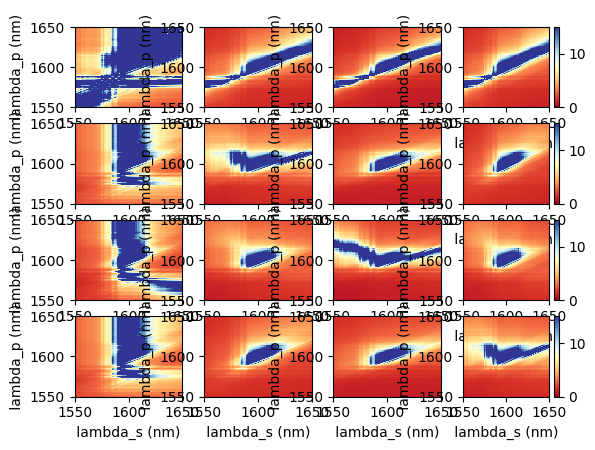

In [36]:
#Plotting the coherence length for different combination of angles
 
for k in np.arange(1,angledivisions+1).reshape(-1):
    
    k = 1
    phi_i = (k - 1) * anglesize
    for i in np.arange(1,angledivisions+1).reshape(-1):
        theta_s = (i - 1) * anglesize
        for j in np.arange(1,angledivisions+1).reshape(-1):
            theta_i = (j - 1) * anglesize
            
          
            kx = 2 * np.pi * (2 * n_p / lambda_p - n_s / lambda_s * np.cos(theta_s) - n_i / lambda_i * np.cos(theta_i) * np.cos(phi_i))
            ky = 2 * np.pi * (n_s / lambda_s * np.sin(theta_s) + n_i / lambda_i * np.sin(theta_i) * np.cos(phi_i))
            kz = 2 * np.pi * n_i / lambda_i * np.sin(phi_i)
            delta_k = np.sqrt(kx ** 2 + ky ** 2 + kz ** 2)

            L_coh = 2 / delta_k
            
            plt.subplot(angledivisions,angledivisions,angledivisions * (i - 1) + j)
            
            cm = plt.cm.get_cmap('RdYlBu')
            norm=plt.Normalize(0,15)
            a,b = extents(x)
            c,d = extents(y)
            extent=[1550,1650,1550,1650]
            a = plt.imshow(L_coh*10**6,cmap = cm,norm =norm, aspect='auto', interpolation='none',extent= extent, origin='lower')
            if j == angledivisions:
                 plt.colorbar(a)
           
            plt.xlabel(' lambda_s (nm) ')
            plt.xlim(np.array([1550,1650]))
           
            plt.ylabel(' lambda_p (nm) ')
            plt.ylim(np.array([1550,1650]))
#             plt.show()
            
            

        

